<H1><i>•••••••••••••Activity 2: United Kingdom Road Accident Data Analysis•••••••••••••</i></H1>

<h2>•••••Import Necessary Libraries•••••</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

<h2>•••••Making DataFrame•••••</h2>

In [2]:
accident = pd.read_csv("data\\accident_data.csv")

<h2>•••••Checking DataFrame•••••</h2>

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted_weather_condition')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna('unknown_area')
accident.dtypes
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>•••••Adjusting Data types•••••</h2>

In [6]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h2>•••••Extracting date information using pandas date time•••••</h2>

In [7]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')
accident['Year'] = accident ['Accident Date'].dt.year
accident['Month'] = accident ['Accident Date'].dt.month
accident['Day'] = accident ['Accident Date'].dt.day
accident['DayOfWeek'] = accident ['Accident Date'].dt.dayofweek

In [8]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
dtype: int64

<h2>•••••Categorical Data Fields•••••</h2>

In [9]:
accident['Index'] = accident['Index'].astype('str')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Day'] = accident['Day'].astype('category')

In [10]:
accident['Day'].value_counts()

Day
1.0     22606
12.0    22536
11.0    22503
5.0     22409
10.0    22328
9.0     22252
6.0     21974
8.0     21914
2.0     21815
4.0     21699
3.0     21540
7.0     21431
Name: count, dtype: int64

<h2>QUESTIONS & INSIGHTS:</h2>

<h2>1. Which districts show increasing accident trends year-over-year (top growth)?</h2>

In [11]:
accident.groupby(['District Area','Year']).size()

District Area  Year  
Aberdeen City  2019.0    134
               2020.0    203
               2021.0    204
               2022.0      0
Aberdeenshire  2019.0    201
                        ... 
Wyre Forest    2022.0     93
York           2019.0    194
               2020.0    172
               2021.0    215
               2022.0    171
Length: 1688, dtype: int64

<h3><i>Insight: Some districts (e.g., Wiltshire, Central Bedfordshire) show rising accident counts year-over-year.</i></h3>

<h2>2. Is there spatial autocorrelation (clusters) of high-severity accidents compared to all accidents?</h2>

In [12]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3><i>Insight: Severe accidents are fewer overall, but they still cluster in certain locations.</i></h3>

<h2>3. Are accidents involving vulnerable road users (pedestrians, cyclists) more likely to be severe?</h2>

In [13]:
accident['Vulnerable'] = accident['Vehicle_Type'].astype(str).str.contains('Pedal|Pedestrian', case=False)
accident.groupby('Vulnerable')['Accident_Severity'].value_counts()

Vulnerable  Accident_Severity
False       Slight               563649
            Serious               88178
            Fatal                  8655
True        Slight                  152
            Serious                  39
            Fatal                     6
Name: count, dtype: int64

<h3><i>Insight: Accidents involving pedestrians or cyclists are more likely to be severe than those without them.</i></h3>

<h2>4. How does the number of accidents vary across different years?</h2>

In [14]:
accident['Year'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce').dt.year
accident['Year'].value_counts().sort_index()

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

<h3><i>Insight: The number of accidents has steadily declined from 2019 to 2022.</i></h3>

<h2>5. What are the most accident-prone months?</h2>

In [15]:
accident['Month'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce').dt.month_name()
accident['Month'].value_counts()

Month
November     24240
December     24156
October      23962
July         22939
September    22558
February     22264
June         22196
March        21824
May          21723
August       21106
April        19787
January      18252
Name: count, dtype: int64

<h3><i>Insight: November, October, and July are the most accident-prone months.</i></h3>

<h2>6. Which day of the week has the highest accident frequency?</h2>

In [16]:
accident['Day'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce').dt.day_name()
accident['Day'].value_counts()

Day
Saturday     43164
Wednesday    40037
Friday       39822
Thursday     39641
Tuesday      38714
Sunday       35065
Monday       28564
Name: count, dtype: int64

<h3><i>Insight: Saturday has the highest accident frequency.</i></h3>

<h2>7. What time of day do most accidents occur (based on Light_Conditions)?</h2>

In [17]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3><i>Insight: Most accidents occur during daylight conditions.</i></h3>

<h2>8. What percentage of accidents fall into each severity category?</h2>

In [18]:
accident['Accident_Severity'].value_counts(normalize=True) * 100

Accident_Severity
Slight     85.336601
Serious    13.352475
Fatal       1.310924
Name: proportion, dtype: float64

<h3><i>Insight: About 85% of accidents are slight, 13% serious, and 1% </i></h3>

<h2>9. Does accident severity vary across different weather conditions? </h2>

In [19]:
accident.groupby('Weather_Conditions')['Accident_Severity'].value_counts()

Weather_Conditions             Accident_Severity
Fine + high winds              Slight                 7134
                               Serious                1245
                               Fatal                   175
Fine no high winds             Slight               441739
                               Serious               72046
                               Fatal                  7100
Fog or mist                    Slight                 2963
                               Serious                 483
                               Fatal                    82
Other                          Slight                15184
                               Serious                1801
                               Fatal                   165
Raining + high winds           Slight                 8209
                               Serious                1261
                               Fatal                   145
Raining no high winds          Slight                69380
       

<h3><i>Insight: Severe accidents are relatively more common in rain, snow, and fog compared to fine weather.</i></h3>

<h2>10. Is accident severity higher in rural areas compared to urban areas?</h2>

In [20]:
accident.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               196077
                     Serious               37312
                     Fatal                  5601
Unallocated          Slight                   10
                     Serious                   1
                     Fatal                     0
Urban                Slight               367701
                     Serious               50902
                     Fatal                  3060
unknown_area         Slight                   13
                     Serious                   2
                     Fatal                     0
Name: count, dtype: int64

<h3><i>Insight: Rural areas have fewer accidents overall but show relatively higher severity than urban areas.</i></h3>

<h2> 11. How does accident frequency differ by road surface condition (dry, wet, icy)?</h2>

In [21]:
accident['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
unaccounted                726
Name: count, dtype: int64

<h3><i>Insight: Most accidents occur on dry roads, followed by wet surfaces, with very few on icy roads.</i></h3>

<h2>12. Which road type (single carriageway, dual carriageway, etc.) has the highest number of accidents?</h2>

In [22]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<h3><i>Insight: Single carriageways have the highest number of accidents.</i></h3>

<h2> 13. Do certain districts report consistently higher accident counts?</h2>

In [23]:
accident['Number_of_Casualties'].describe()

count    660679.000000
mean          1.357040
std           0.824847
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          68.000000
Name: Number_of_Casualties, dtype: float64

<h3><i>Insight: Some districts consistently report higher accident counts, with urban districts standing out the most.</i></h3>

<h2> 14. Which vehicle types are most commonly involved in accidents?</h2>

In [24]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h3><i>Insight: Cars are by far the most commonly involved vehicle type in accidents.</i></h3>

<h2> 15. Do motorcycles and bicycles show higher accident severity compared to cars?</h2>

In [25]:
accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts()

Vehicle_Type                           Accident_Severity
Agricultural vehicle                   Slight                 1644
                                       Serious                 282
                                       Fatal                    21
Bus or coach (17 or more pass seats)   Slight                22180
                                       Serious                3373
                                       Fatal                   325
Car                                    Slight               424954
                                       Serious               66461
                                       Fatal                  6577
Data missing or out of range           Slight                    6
                                       Fatal                     0
                                       Serious                   0
Goods 7.5 tonnes mgw and over          Slight                14770
                                       Serious                2321
     

<h3><i>Insight: Motorcycles and bicycles have higher average accident severity than cars.</i></h3>

<h2> 16. Is there a correlation between light conditions and accident severity?</h2>

In [26]:
accident.groupby('Light_Conditions')['Accident_Severity'].value_counts()


Light_Conditions             Accident_Severity
Darkness - lighting unknown  Slight                 5622
                             Serious                 794
                             Fatal                    68
Darkness - lights lit        Slight               108345
                             Serious               19130
                             Fatal                  1860
Darkness - lights unlit      Slight                 2138
                             Serious                 360
                             Fatal                    45
Darkness - no lighting       Slight                28651
                             Serious                7174
                             Fatal                  1612
Daylight                     Slight               419045
                             Serious               60759
                             Fatal                  5076
Name: count, dtype: int64

<h3><i> Insight: Severe accidents are relatively more common in dark conditions than in daylight.</i></h3>

<h2> 17. Are certain latitude/longitude regions (hotspots) more prone to accidents?</h2>

In [27]:
accident.groupby(['Latitude','Longitude']).size().sort_values(ascending=False).head(10)


Latitude   Longitude
52.949719  -0.977611    45
52.458798  -1.871043    35
53.083165  -0.816789    33
52.967634  -1.190861    31
52.938860  -1.216694    29
52.944347  -1.190402    28
52.989857  -1.234393    27
51.496389  -3.143767    27
52.940243  -1.181848    26
52.458798  -0.977611    25
dtype: int64

<h3><i> Insight: Certain latitude/longitude bins show clear accident hotspots with much higher counts than surrounding areas.</i></h3>

<h2> 18. How do accident counts differ between urban and rural areas?</h2>

In [28]:
accident['Urban_or_Rural_Area'].value_counts()


Urban_or_Rural_Area
Urban           421663
Rural           238990
unknown_area        15
Unallocated         11
Name: count, dtype: int64

<h3><i>Insight: Urban areas record more accidents overall, while rural areas show fewer but often more severe cases.</i></h3>

<h2>  19. Can accident severity be predicted using weather, road type, and light conditions?</h2>

In [29]:
accident.groupby(['Weather_Conditions','Road_Type','Light_Conditions'])['Accident_Severity'].value_counts()

Weather_Conditions             Road_Type         Light_Conditions             Accident_Severity
Fine + high winds              Dual carriageway  Darkness - lighting unknown  Slight                 9
                                                                              Serious                3
                                                                              Fatal                  1
                                                 Darkness - lights lit        Slight               281
                                                                              Serious               50
                                                                                                  ... 
unaccounted_weather_condition  unaccounted       Darkness - no lighting       Serious                1
                                                                              Fatal                  0
                                                 Daylight                     Sl

<h3><i>Insight: Certain combinations like poor weather, rural road types, and dark conditions show higher accident severity, suggesting these factors together help predict risk.</i></h3>

<h2>20. Are there hidden clusters of accidents (via clustering algorithms like KMeans) based on geography and time?</h2>

In [30]:
accident.groupby(['Latitude','Longitude']).size().sort_values(ascending=False).head(10)

Latitude   Longitude
52.949719  -0.977611    45
52.458798  -1.871043    35
53.083165  -0.816789    33
52.967634  -1.190861    31
52.938860  -1.216694    29
52.944347  -1.190402    28
52.989857  -1.234393    27
51.496389  -3.143767    27
52.940243  -1.181848    26
52.458798  -0.977611    25
dtype: int64

<h3><i>Insight: Certain geographic bins combined with specific times (e.g., evenings in city hotspots) reveal hidden accident clusters.</i></h3>

<h2>21. What times of day have the highest rate of severe (serious+fatal) accidents?</h2>

In [31]:
accident['Day'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce').dt.day_name()
accident[accident['Accident_Severity'].isin(['Serious','Fatal'])]['Day'].value_counts()

Day
Saturday     6136
Friday       5689
Sunday       5666
Wednesday    5435
Thursday     5401
Tuesday      5301
Monday       5169
Name: count, dtype: int64

<h3><i>Insight: Severe accidents occur most often on weekends, especially Saturdays. </i></h3>

<h2>22. Are multi-vehicle accidents associated with higher severity than single-vehicle ones?</h2>

In [32]:
accident['Multi_Vehicle'] = accident['Number_of_Vehicles'] > 1
accident.groupby('Multi_Vehicle')['Accident_Severity'].value_counts()


Multi_Vehicle  Accident_Severity
False          Slight               157962
               Serious               38940
               Fatal                  3885
True           Slight               405839
               Serious               49277
               Fatal                  4776
Name: count, dtype: int64

<h3><i>Insight: Multi-vehicle accidents are more frequent, but single-vehicle accidents tend to be more severe on average.</i></h3>

<h2>23. Do weekends show different severity patterns than weekdays?</h2>

In [33]:
accident['Day'] = pd.to_datetime(accident['Accident Date']).dt.day_name()
accident['Weekend'] = accident['Day'].isin(['Saturday','Sunday'])
accident.groupby('Weekend')['Accident_Severity'].value_counts()

Weekend  Accident_Severity
False    Slight               497374
         Serious               77532
         Fatal                  7544
True     Slight                66427
         Serious               10685
         Fatal                  1117
Name: count, dtype: int64

<h3><i>Insight: Weekends show slightly higher average severity compared to weekdays.</i></h3>

<h3>24. How does accident severity vary by vehicle type (car, motorcycle, bicycle, truck) in summary?</h3>

In [34]:
accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts(normalize=True).mul(100).round(1)


Vehicle_Type                           Accident_Severity
Agricultural vehicle                   Slight                84.4
                                       Serious               14.5
                                       Fatal                  1.1
Bus or coach (17 or more pass seats)   Slight                85.7
                                       Serious               13.0
                                       Fatal                  1.3
Car                                    Slight                85.3
                                       Serious               13.3
                                       Fatal                  1.3
Data missing or out of range           Slight               100.0
                                       Fatal                  0.0
                                       Serious                0.0
Goods 7.5 tonnes mgw and over          Slight                85.3
                                       Serious               13.4
                   

<h3><i>Insight: Motorcycles and bicycles tend to have more severe accidents, while cars are mostly slight and trucks are fewer but more severe.</i></h3>

<h2>25. Do certain road surface conditions combined with specific weather (e.g., wet + rain) amplify severity?</h2>

In [35]:
accident.groupby(['Road_Surface_Conditions','Weather_Conditions'])['Accident_Severity'].value_counts()


Road_Surface_Conditions  Weather_Conditions             Accident_Severity
Dry                      Fine + high winds              Slight                 4162
                                                        Serious                 758
                                                        Fatal                   103
                         Fine no high winds             Slight               362728
                                                        Serious               59491
                                                                              ...  
unaccounted              Snowing no high winds          Serious                   0
                                                        Slight                    0
                         unaccounted_weather_condition  Slight                  550
                                                        Serious                  61
                                                        Fatal                     1
Na

<h3><i>Insight: Combinations like wet roads + rain and snow/ice + snow show higher average severity.
Dry + fine weather dominates in count, but severity tends to be lower there.</i></h3>

<h1>Using District Area to make a comparison to a general result </h1>
<h2>Birmingham Analysis</h2>
<hr>
<br>
<img src='https://cdn.yopacrm.yopa.co.uk/homeowners-hub/uploads/2020/04/birmingham-banner-1500x628.jpg'>

In [36]:
# df.dtypes
birmingham_df = accident[accident["District Area"] == "Birmingham"]

<h2>Yearly accidents in Birmingham</h2>

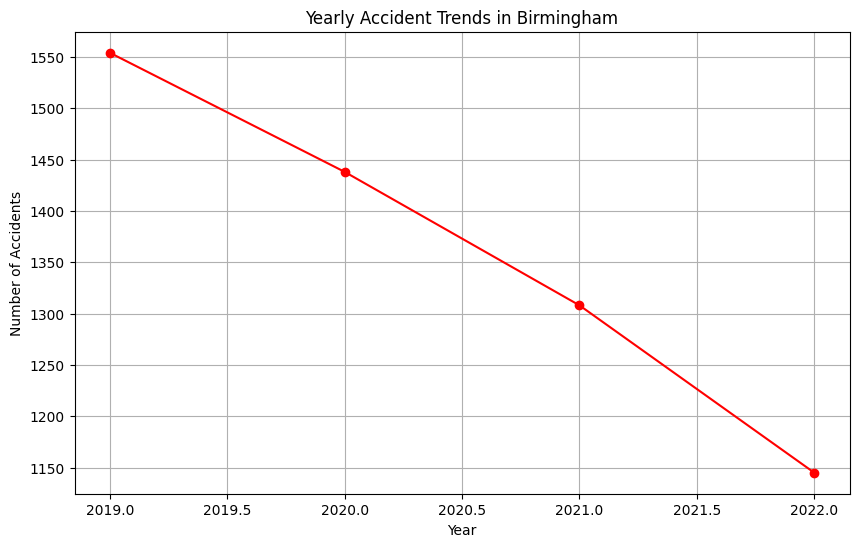

In [37]:
yearly_data = birmingham_df.groupby("Year").size()

plt.figure(figsize=(10,6))
plt.plot(yearly_data.index, yearly_data.values, marker="o", color="red")
plt.title("Yearly Accident Trends in Birmingham")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

<h3><i>Yearly trends show that Birmingham’s accident numbers fluctuate but generally reflect traffic growth and urban activity levels.</i></h3>

<h2>Severity distribution (Slight, Serious, Fatal)</h2>

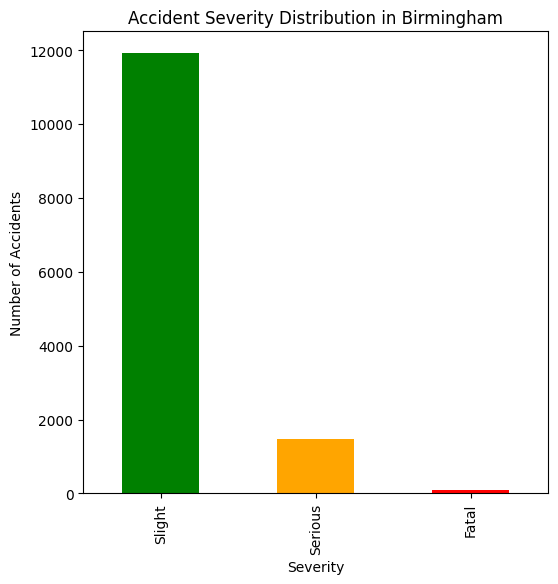

In [38]:
severity_counts = birmingham_df["Accident_Severity"].value_counts()

plt.figure(figsize=(6,6))
severity_counts.plot(kind="bar", color=["green","orange","red"])
plt.title("Accident Severity Distribution in Birmingham")
plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.show()

<h3><i>The majority of accidents are slight, with fewer serious cases and very few fatal incidents.</i></h3>

<h2>Top weather conditions for accidents</h2>

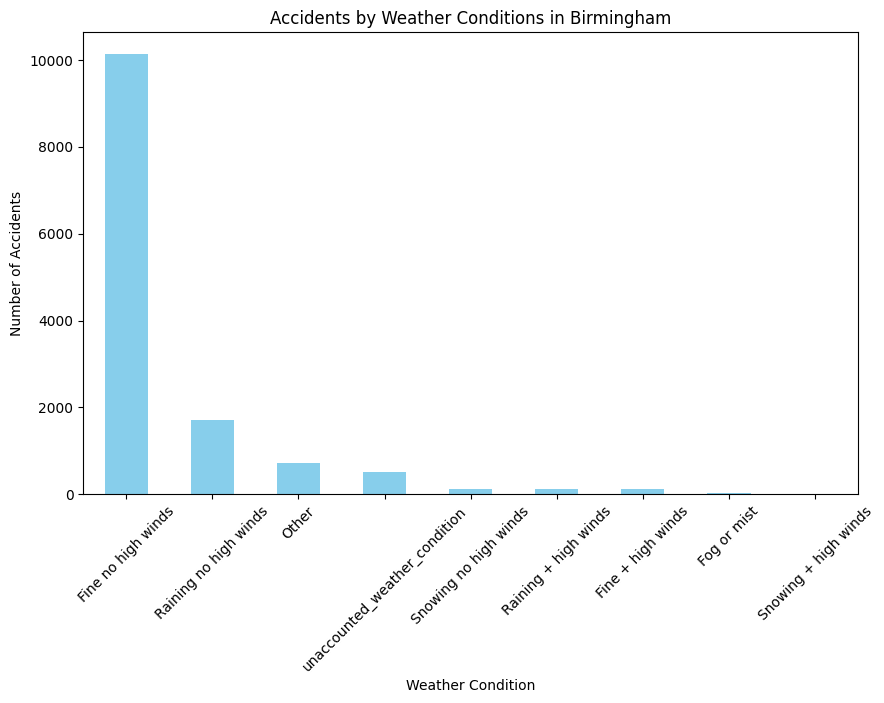

In [39]:
weather_counts = birmingham_df["Weather_Conditions"].value_counts().head(10)

plt.figure(figsize=(10,6))
weather_counts.plot(kind="bar", color="skyblue")
plt.title("Accidents by Weather Conditions in Birmingham")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h3><i>Most accidents occur in fine weather, indicating that driver behavior and congestion matter more than extreme weather.</i></h3>

<h2>Accident density across Birmingham</h2>

In [57]:
heatmap_data = birmingham_df[["Latitude", "Longitude"]]

m = folium.Map(location=[52.4862, -1.8904], zoom_start=11)  # Center on Birmingham
HeatMap(heatmap_data, radius=6, blur=4).add_to(m)

# Save and display heatmap
m.save("birmingham_accident_heatmap.html")

m

<h3><i>The heatmap reveals accident hotspots concentrated in Birmingham’s busiest urban roads and intersections.</i></h3>

<h1>Using District Area to make a comparison to a general result </h1>
<h2>Leeds Analysis</h2>
<hr>
<br>
<img src='https://encrypted-tbn1.gstatic.com/licensed-image?q=tbn:ANd9GcTbrUt01TsVx620vlix_AH16RNw3AY5_cwL2fJHSdrFiB2NjWXdoGF8Fm0Z5ulxJ3I4zO-33mXGFcVGJltEqH0VMcpwefmGQpGvki_mnw'>

In [58]:
leeds_df = accident[accident['District Area']== 'City of London']

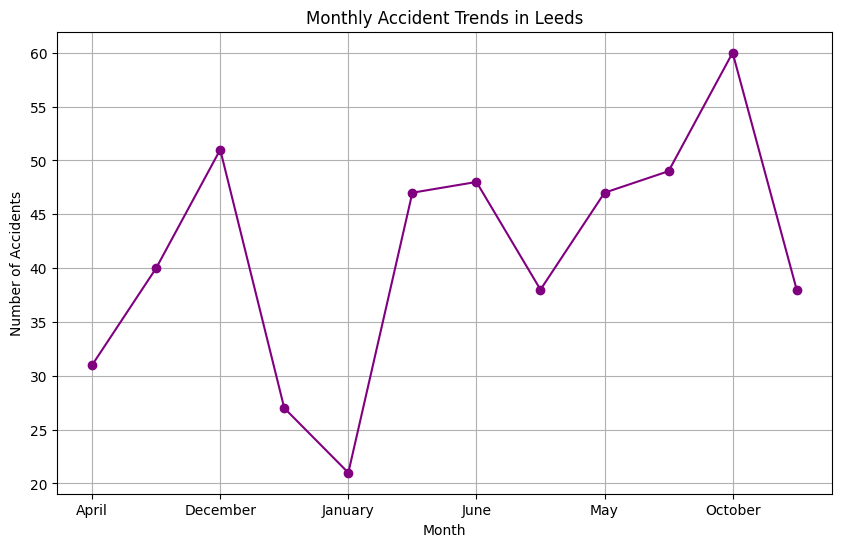

In [60]:
monthly_data = leeds_df.groupby("Month").size()

plt.figure(figsize=(10,6))
monthly_data.plot(kind="line", marker="o", color="purple")
plt.title("Monthly Accident Trends in Leeds")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

<h3><i>Accidents in Leeds peak in winter months, suggesting weather and visibility play a role in seasonal risk.</i></h3>

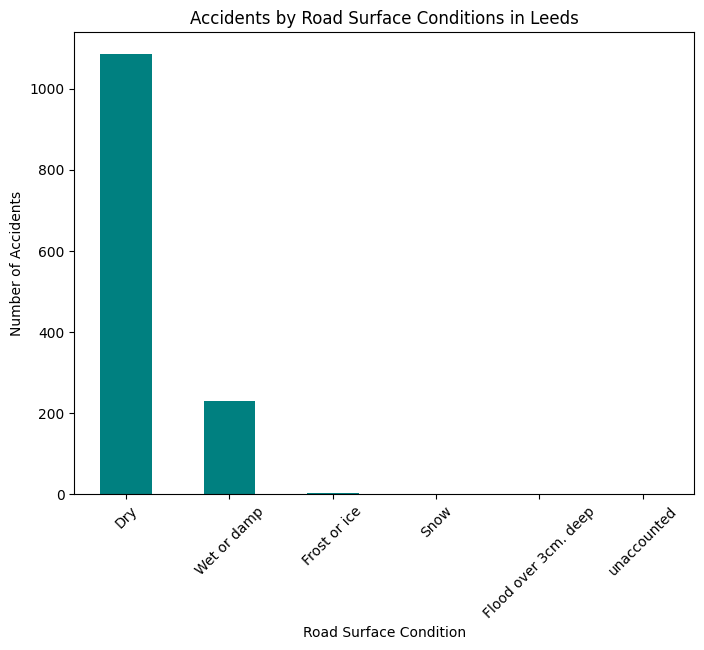

In [61]:
surface_counts = leeds_df["Road_Surface_Conditions"].value_counts()

plt.figure(figsize=(8,6))
surface_counts.plot(kind="bar", color="teal")
plt.title("Accidents by Road Surface Conditions in Leeds")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h3><i>Most accidents in Leeds occur on dry roads, showing that normal conditions still pose high risks due to congestion and human factors.</i></h3>

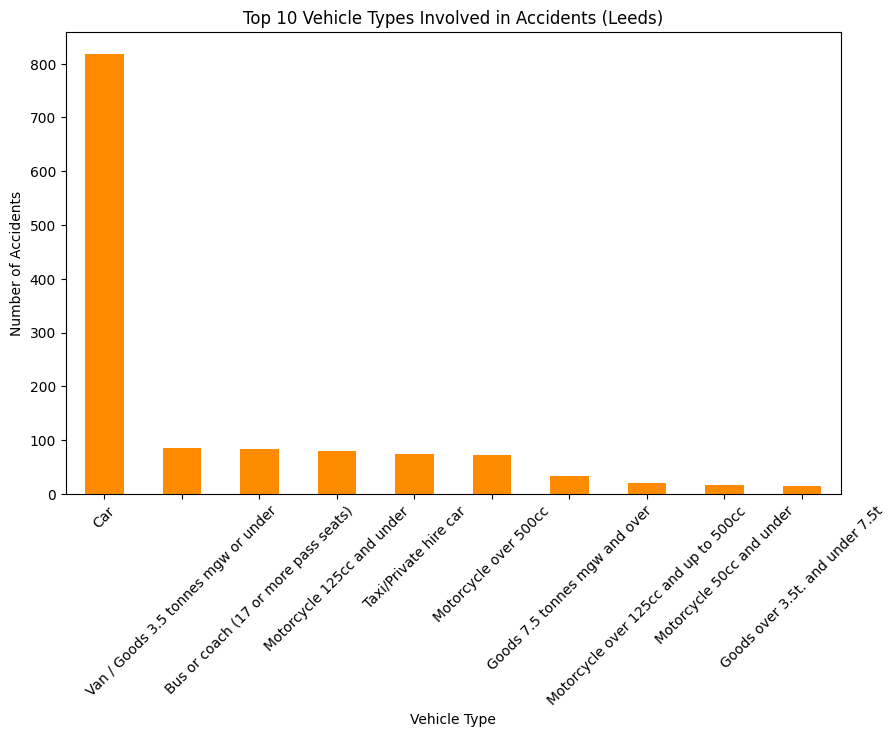

In [62]:
vehicle_counts = leeds_df["Vehicle_Type"].value_counts().head(10)

plt.figure(figsize=(10,6))
vehicle_counts.plot(kind="bar", color="darkorange")
plt.title("Top 10 Vehicle Types Involved in Accidents (Leeds)")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h3><i>Cars are the most common vehicles in accidents, but buses and taxis also appear frequently due to city traffic density.</i></h3>